## 十分钟入门pandas

In [1]:
import numpy as np
import pandas as pd

### 1. 生成对象
用值列表生成 Series 时，Pandas 默认自动生成整数索引

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

用含日期时间索引与标签的 NumPy 数组生成 DataFrame

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df1_1 = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df1_1

,A,B,C,D
2013-01-01,0.731062,0.307450,-2.044556,0.522168
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356
2013-01-04,0.260493,0.373230,-1.303782,0.398941
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980
2013-01-06,-1.117807,0.073588,-0.198660,1.287131


用 Series 字典对象生成 DataFrame

In [5]:
df1_2 = pd.DataFrame({'A': 1.,
                      'B': pd.Timestamp('20130102'),
                      'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                      'D': np.array([3] * 4, dtype='int32'),
                      'E': pd.Categorical(["test", "train", "test", "train"]),
                      'F': 'foo'
                     })
df1_2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
df1_2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### 2. 查看数据

In [7]:
# 显示头部数据
df1_1.head()

,A,B,C,D
2013-01-01,0.731062,0.307450,-2.044556,0.522168
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356
2013-01-04,0.260493,0.373230,-1.303782,0.398941
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980


In [8]:
# 显示尾部数据
df1_1.tail(3)

,A,B,C,D
2013-01-04,0.260493,0.373230,-1.303782,0.398941
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980
2013-01-06,-1.117807,0.073588,-0.198660,1.287131


In [9]:
# 显示索引和列名
df1_1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df1_1.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
# df1_1 中的值都是浮点数，to_numpy操作会很快，而且不复制数据。
df1_1.to_numpy()

array([[ 0.73106175,  0.30745035, -2.04455612,  0.52216752],
       [-0.77442814, -0.13292468,  0.06862599, -2.26515459],
       [ 0.77585434, -1.51413721, -0.44988189, -0.08335629],
       [ 0.26049306,  0.37323029, -1.30378227,  0.39894078],
       [-0.87751848, -0.50035821, -0.75100273,  0.45697962],
       [-1.11780685,  0.07358765, -0.19866027,  1.28713055]])

In [12]:
# df1_2中的值包含了多种类型，to_numpy 就会很费资源。
df1_2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
# describe()可查看dataframe摘要
df1_1.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.167057,-0.232192,-0.779876,0.052785
std,0.855112,0.703762,0.779922,1.218073
min,-1.117807,-1.514137,-2.044556,-2.265155
25%,-0.851746,-0.408500,-1.165587,0.037218
50%,-0.256968,-0.029669,-0.600442,0.427960
75%,0.613420,0.248985,-0.261466,0.505871
max,0.775854,0.373230,0.068626,1.287131


In [14]:
# 转置数据
df1_1.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.731062,-0.774428,0.775854,0.260493,-0.877518,-1.117807
B,0.307450,-0.132925,-1.514137,0.373230,-0.500358,0.073588
C,-2.044556,0.068626,-0.449882,-1.303782,-0.751003,-0.198660
D,0.522168,-2.265155,-0.083356,0.398941,0.456980,1.287131


In [15]:
# 按轴排序
df1_1.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.522168,-2.044556,0.307450,0.731062
2013-01-02,-2.265155,0.068626,-0.132925,-0.774428
2013-01-03,-0.083356,-0.449882,-1.514137,0.775854
2013-01-04,0.398941,-1.303782,0.373230,0.260493
2013-01-05,0.456980,-0.751003,-0.500358,-0.877518
2013-01-06,1.287131,-0.198660,0.073588,-1.117807


In [16]:
# 按值排序
df1_1.sort_values(by='B')

,A,B,C,D
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155
2013-01-06,-1.117807,0.073588,-0.198660,1.287131
2013-01-01,0.731062,0.307450,-2.044556,0.522168
2013-01-04,0.260493,0.373230,-1.303782,0.398941


### 3. 选择数据

In [17]:
# 选择单列，产生 Series，与 df.A 等效：
df1_1['A']


2013-01-01    0.731062
2013-01-02   -0.774428
2013-01-03    0.775854
2013-01-04    0.260493
2013-01-05   -0.877518
2013-01-06   -1.117807
Freq: D, Name: A, dtype: float64

In [18]:
df1_1.A

2013-01-01    0.731062
2013-01-02   -0.774428
2013-01-03    0.775854
2013-01-04    0.260493
2013-01-05   -0.877518
2013-01-06   -1.117807
Freq: D, Name: A, dtype: float64

In [19]:
# 使用[]按行进行切片
df1_1[0:3]

,A,B,C,D
2013-01-01,0.731062,0.307450,-2.044556,0.522168
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356


In [20]:
# 使用索引进行切片
df1_1['20130101': '20130103']

,A,B,C,D
2013-01-01,0.731062,0.307450,-2.044556,0.522168
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356


#### 3.1. 按标签选择

In [21]:
# 使用标签选择一行数据
df1_1.loc[dates[0]]

A    0.731062
B    0.307450
C   -2.044556
D    0.522168
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
# 使用标签选择多列数据
df1_1.loc[:'20130102', ['A', 'B']]

,A,B
2013-01-01,0.731062,0.307450
2013-01-02,-0.774428,-0.132925


In [23]:
# 使用标签切片，包含行和列结束点
df1_1.loc['20130101':'20130102', ['A', 'B']]

,A,B
2013-01-01,0.731062,0.307450
2013-01-02,-0.774428,-0.132925


In [24]:
# 返回对象降维
df1_1.loc['20130102', ['A', 'B']]

A   -0.774428
B   -0.132925
Name: 2013-01-02 00:00:00, dtype: float64

In [25]:
# 提取标量值
df1_1.loc[dates[0], 'A']

0.7310617464924573

In [26]:
# 快速范围标量
df1_1.at[dates[0], 'A']

0.7310617464924573

#### 3.2. 按位置选择

In [27]:
# 用整数位置选择
df1_1.iloc[3]

A    0.260493
B    0.373230
C   -1.303782
D    0.398941
Name: 2013-01-04 00:00:00, dtype: float64

In [28]:
# 类似Numpy/Python，用整数切片
df1_1.iloc[3:5, 0:2]

,A,B
2013-01-04,0.260493,0.373230
2013-01-05,-0.877518,-0.500358


In [29]:
# 类似Numpy/Python, 使用整数列表进行切片
df1_1.iloc[[1,3,5], [1,2]]

,B,C
2013-01-02,-0.132925,0.068626
2013-01-04,0.373230,-1.303782
2013-01-06,0.073588,-0.198660


In [30]:
# 显式整行切片
df1_1.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356


In [31]:
# 显式整列切片
df1_1.iloc[:, 1:3]

,B,C
2013-01-01,0.307450,-2.044556
2013-01-02,-0.132925,0.068626
2013-01-03,-1.514137,-0.449882
2013-01-04,0.373230,-1.303782
2013-01-05,-0.500358,-0.751003
2013-01-06,0.073588,-0.198660


In [32]:
# 显式提取值
df1_1.iloc[1, 1]

-0.13292467711440512

In [33]:
# 显示提取值
df1_1.iat[1, 1]

-0.13292467711440512

#### 3.3. 布尔索引


In [34]:
# 使用单列值获取索引
df1_1[df1_1.A < 0]

,A,B,C,D
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980
2013-01-06,-1.117807,0.073588,-0.198660,1.287131


In [35]:
# 选择dataframe中满足条件的
df1_1[df1_1 > 0]

,A,B,C,D
2013-01-01,0.731062,0.307450,NaN,0.522168
2013-01-02,NaN,NaN,0.068626,NaN
2013-01-03,0.775854,NaN,NaN,NaN
2013-01-04,0.260493,0.373230,NaN,0.398941
2013-01-05,NaN,NaN,NaN,0.456980
2013-01-06,NaN,0.073588,NaN,1.287131


In [36]:
# 使用isin筛选
df6 = df1_1.copy()
df6['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df6

,A,B,C,D,E
2013-01-01,0.731062,0.307450,-2.044556,0.522168,one
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155,one
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356,two
2013-01-04,0.260493,0.373230,-1.303782,0.398941,three
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980,four
2013-01-06,-1.117807,0.073588,-0.198660,1.287131,three


In [37]:
df6[df6['E'].isin(['one', 'two'])]

,A,B,C,D,E
2013-01-01,0.731062,0.307450,-2.044556,0.522168,one
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155,one
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356,two


####  3.4. 赋值

In [38]:
# 用索引自动对齐新增列数据
s7 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s7

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [39]:
df6['F'] = s7
df6

,A,B,C,D,E,F
2013-01-01,0.731062,0.307450,-2.044556,0.522168,one,NaN
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155,one,1.0
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356,two,2.0
2013-01-04,0.260493,0.373230,-1.303782,0.398941,three,3.0
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980,four,4.0
2013-01-06,-1.117807,0.073588,-0.198660,1.287131,three,5.0


In [40]:
# 按标签赋值
df6.at[dates[0], 'A'] = 0
df6

,A,B,C,D,E,F
2013-01-01,0.000000,0.307450,-2.044556,0.522168,one,NaN
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155,one,1.0
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356,two,2.0
2013-01-04,0.260493,0.373230,-1.303782,0.398941,three,3.0
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980,four,4.0
2013-01-06,-1.117807,0.073588,-0.198660,1.287131,three,5.0


In [41]:
# 按位置赋值
df6.iat[0, 1] = 0
df6

,A,B,C,D,E,F
2013-01-01,0.000000,0.000000,-2.044556,0.522168,one,NaN
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155,one,1.0
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356,two,2.0
2013-01-04,0.260493,0.373230,-1.303782,0.398941,three,3.0
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980,four,4.0
2013-01-06,-1.117807,0.073588,-0.198660,1.287131,three,5.0


In [42]:
# 按 NumPy 数组赋值：
df6.loc[:, 'E'] = np.array([3]* len(df6))
df6

,A,B,C,D,E,F
2013-01-01,0.000000,0.000000,-2.044556,0.522168,3,NaN
2013-01-02,-0.774428,-0.132925,0.068626,-2.265155,3,1.0
2013-01-03,0.775854,-1.514137,-0.449882,-0.083356,3,2.0
2013-01-04,0.260493,0.373230,-1.303782,0.398941,3,3.0
2013-01-05,-0.877518,-0.500358,-0.751003,0.456980,3,4.0
2013-01-06,-1.117807,0.073588,-0.198660,1.287131,3,5.0


In [43]:
# 使用where条件进行赋值
df6[df6 > 0] = -df6
df6

,A,B,C,D,E,F
2013-01-01,0.000000,0.000000,-2.044556,-0.522168,-3,NaN
2013-01-02,-0.774428,-0.132925,-0.068626,-2.265155,-3,-1.0
2013-01-03,-0.775854,-1.514137,-0.449882,-0.083356,-3,-2.0
2013-01-04,-0.260493,-0.373230,-1.303782,-0.398941,-3,-3.0
2013-01-05,-0.877518,-0.500358,-0.751003,-0.456980,-3,-4.0
2013-01-06,-1.117807,-0.073588,-0.198660,-1.287131,-3,-5.0


### 4. 缺失值
Pandas 主要用 np.nan 表示缺失数据。 计算时，默认不包含空值。 

In [44]:
# 重建索引（reindex）可以更改、添加、删除指定轴的索引，并返回数据副本，即不更改原数据。
df8 = df6.reindex(columns=['A', 'B', 'C', 'D', 'F'])
df8

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.044556,-0.522168,NaN
2013-01-02,-0.774428,-0.132925,-0.068626,-2.265155,-1.0
2013-01-03,-0.775854,-1.514137,-0.449882,-0.083356,-2.0
2013-01-04,-0.260493,-0.373230,-1.303782,-0.398941,-3.0
2013-01-05,-0.877518,-0.500358,-0.751003,-0.456980,-4.0
2013-01-06,-1.117807,-0.073588,-0.198660,-1.287131,-5.0


In [45]:
df8_1 = df8.reindex(index=dates[0:4], columns=list(df8.columns) + ['E'])
df8_1.loc[dates[:2], 'E'] = 1
df8_1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.044556,-0.522168,NaN,1.0
2013-01-02,-0.774428,-0.132925,-0.068626,-2.265155,-1.0,1.0
2013-01-03,-0.775854,-1.514137,-0.449882,-0.083356,-2.0,NaN
2013-01-04,-0.260493,-0.373230,-1.303782,-0.398941,-3.0,NaN


In [46]:
# 删除所有缺失的行
df8_1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.774428,-0.132925,-0.068626,-2.265155,-1.0,1.0


In [47]:
# 填充缺失值
df8_1.fillna(value=0)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-2.044556,-0.522168,0.0,1.0
2013-01-02,-0.774428,-0.132925,-0.068626,-2.265155,-1.0,1.0
2013-01-03,-0.775854,-1.514137,-0.449882,-0.083356,-2.0,0.0
2013-01-04,-0.260493,-0.373230,-1.303782,-0.398941,-3.0,0.0


In [48]:
# 提取nan值的布尔掩码
pd.isna(df8_1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### 5. 运算

#### 5.1 统计

In [49]:
df8

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.044556,-0.522168,NaN
2013-01-02,-0.774428,-0.132925,-0.068626,-2.265155,-1.0
2013-01-03,-0.775854,-1.514137,-0.449882,-0.083356,-2.0
2013-01-04,-0.260493,-0.373230,-1.303782,-0.398941,-3.0
2013-01-05,-0.877518,-0.500358,-0.751003,-0.456980,-4.0
2013-01-06,-1.117807,-0.073588,-0.198660,-1.287131,-5.0


In [50]:
# 一般情况下，运算时排除缺失值。
# 描述性统计
df8.mean()

A   -0.634350
B   -0.432373
C   -0.802752
D   -0.835622
F   -3.000000
dtype: float64

In [51]:
df8.mean(1)

2013-01-01   -0.641681
2013-01-02   -0.848227
2013-01-03   -0.964646
2013-01-04   -1.067289
2013-01-05   -1.317172
2013-01-06   -1.535437
Freq: D, dtype: float64

In [52]:
# 不同维度对象运算时，要先对齐。 此外，Pandas 自动沿指定维度广播。
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(1)
s

2013-01-01    NaN
2013-01-02    1.0
2013-01-03    3.0
2013-01-04    5.0
2013-01-05    NaN
2013-01-06    6.0
Freq: D, dtype: float64

In [53]:
df8.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,-1.774428,-1.132925,-1.068626,-3.265155,-2.0
2013-01-03,-3.775854,-4.514137,-3.449882,-3.083356,-5.0
2013-01-04,-5.260493,-5.373230,-6.303782,-5.398941,-8.0
2013-01-05,NaN,NaN,NaN,NaN,NaN
2013-01-06,-7.117807,-6.073588,-6.198660,-7.287131,-11.0


#### 5.2 Apply函数处理数据

In [54]:
df8

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.044556,-0.522168,NaN
2013-01-02,-0.774428,-0.132925,-0.068626,-2.265155,-1.0
2013-01-03,-0.775854,-1.514137,-0.449882,-0.083356,-2.0
2013-01-04,-0.260493,-0.373230,-1.303782,-0.398941,-3.0
2013-01-05,-0.877518,-0.500358,-0.751003,-0.456980,-4.0
2013-01-06,-1.117807,-0.073588,-0.198660,-1.287131,-5.0


In [55]:
df8.apply(np.cumsum)  # 累加函数

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-2.044556,-0.522168,NaN
2013-01-02,-0.774428,-0.132925,-2.113182,-2.787322,-1.0
2013-01-03,-1.550282,-1.647062,-2.563064,-2.870678,-3.0
2013-01-04,-1.810776,-2.020292,-3.866846,-3.269619,-6.0
2013-01-05,-2.688294,-2.520650,-4.617849,-3.726599,-10.0
2013-01-06,-3.806101,-2.594238,-4.816509,-5.013729,-15.0


In [56]:
df8.apply(lambda x: x.max() - x.min())

A    1.117807
B    1.514137
C    1.975930
D    2.181798
F    4.000000
dtype: float64

#### 5.3 直方图

In [57]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    5
2    1
3    2
4    3
5    4
6    5
7    3
8    2
9    2
dtype: int64

In [58]:
s.value_counts()

2    3
3    2
5    2
0    1
1    1
4    1
dtype: int64

#### 5.4 字符串方法

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [60]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [61]:
s.str.contains('a')

0    False
1    False
2    False
3     True
4     True
5      NaN
6    False
7    False
8     True
dtype: object

### 6. 合并
#### 6.1 结合（concat）

In [62]:
df6 = pd.DataFrame(np.random.randn(10, 4))

In [63]:
df6

,0,1,2,3
0,-0.900976,-0.775364,0.030353,-1.889530
1,-0.208973,0.768066,-0.775466,1.520296
2,1.167348,-0.294156,0.030882,0.189329
3,1.509951,-0.337299,0.113360,-1.702969
4,2.181505,-0.847741,0.487061,-1.987792
5,-0.838362,-0.911758,-0.694658,1.061120
6,-0.307033,0.862543,0.855350,-0.736490
7,0.762092,-1.620914,0.422195,-0.104542
8,-1.757291,-1.679099,1.857224,-0.710449
9,-2.471009,-0.461361,-0.533150,-0.225123


In [64]:
pieces = [df6[:3], df6[3:7], df6[7:]]
df6[3:7]


,0,1,2,3
3,1.509951,-0.337299,0.113360,-1.702969
4,2.181505,-0.847741,0.487061,-1.987792
5,-0.838362,-0.911758,-0.694658,1.061120
6,-0.307033,0.862543,0.855350,-0.736490


In [65]:
pd.concat(pieces)

,0,1,2,3
0,-0.900976,-0.775364,0.030353,-1.889530
1,-0.208973,0.768066,-0.775466,1.520296
2,1.167348,-0.294156,0.030882,0.189329
3,1.509951,-0.337299,0.113360,-1.702969
4,2.181505,-0.847741,0.487061,-1.987792
5,-0.838362,-0.911758,-0.694658,1.061120
6,-0.307033,0.862543,0.855350,-0.736490
7,0.762092,-1.620914,0.422195,-0.104542
8,-1.757291,-1.679099,1.857224,-0.710449
9,-2.471009,-0.461361,-0.533150,-0.225123


#### 6.2 连接join
SQL风格的合并

In [66]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [67]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [68]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [69]:
# 另一个连接例子
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [70]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [71]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


#### 6.3 追加（append）

In [72]:
df6_3 = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df6_3

,A,B,C,D
0,-0.263645,0.433364,-0.452626,-0.502532
1,0.676948,-0.356885,-1.161805,-0.433531
2,-1.043593,-1.853813,-1.843778,-0.973818
3,0.645082,1.462555,0.700389,0.592996
4,0.337872,-0.428648,-0.021711,-0.197920
5,0.808816,-0.671109,-0.096850,1.561225
6,0.688527,-0.177717,0.408029,1.326935
7,-0.746399,0.200067,-0.000886,-1.689606


In [73]:
s = df6_3.iloc[3]
s

A    0.645082
B    1.462555
C    0.700389
D    0.592996
Name: 3, dtype: float64

In [74]:
df6_3.append(s, ignore_index=True)

,A,B,C,D
0,-0.263645,0.433364,-0.452626,-0.502532
1,0.676948,-0.356885,-1.161805,-0.433531
2,-1.043593,-1.853813,-1.843778,-0.973818
3,0.645082,1.462555,0.700389,0.592996
4,0.337872,-0.428648,-0.021711,-0.197920
5,0.808816,-0.671109,-0.096850,1.561225
6,0.688527,-0.177717,0.408029,1.326935
7,-0.746399,0.200067,-0.000886,-1.689606
8,0.645082,1.462555,0.700389,0.592996


### 7. 分组

“group by” 指的是涵盖下列一项或多项步骤的处理流程：

- 分割：按条件把数据分割成多组；
- 应用：为每组单独应用函数；
- 组合：将处理结果组合成一个数据结构。

In [75]:
df7 = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df7

,A,B,C,D
0,foo,one,-0.964390,-1.104380
1,bar,one,0.473233,0.808355
2,foo,two,-0.092230,0.199946
3,bar,three,0.792037,0.270606
4,foo,two,1.344218,-0.808152
5,bar,two,0.932677,-1.892259
6,foo,one,0.896422,-1.539737
7,foo,three,0.141494,0.293106


In [76]:
# 先分组， 再求和。
df7.groupby('A').sum()

,C,D
A,,
bar,2.197946,-0.813299
foo,1.325514,-2.959217


In [77]:
# 多列分组后，生成多组索引，也可以求和
df7.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.473233  0.808355
    three  0.792037  0.270606
    two    0.932677 -1.892259
foo one   -0.067968 -2.644117
    three  0.141494  0.293106
    two    1.251988 -0.608206

### 8.重塑（Reshaping）

In [78]:
 tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                      'foo', 'foo', 'qux', 'qux'],
                     ['one', 'two', 'one', 'two',
                      'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [79]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [80]:
df8 = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df8

A         B
first second                    
bar   one    -1.026998 -0.753551
      two     0.965409  2.339558
baz   one     1.012652 -0.203731
      two     2.274307  0.432607
foo   one     1.541686  0.147105
      two    -0.191728 -0.760952
qux   one     0.806397 -1.708425
      two    -0.662836  0.363336

In [81]:
df8_2 = df8[:4]
df8_2

A         B
first second                    
bar   one    -1.026998 -0.753551
      two     0.965409  2.339558
baz   one     1.012652 -0.203731
      two     2.274307  0.432607

In [82]:
# stack() 方法把 DataFrame 列压缩至一层
stacked = df8_2.stack()
stacked

first  second   
bar    one     A   -1.026998
               B   -0.753551
       two     A    0.965409
               B    2.339558
baz    one     A    1.012652
               B   -0.203731
       two     A    2.274307
               B    0.432607
dtype: float64

In [83]:
# 压缩后的 DataFrame 或 Series 具有多层索引， stack()的逆操作是 unstack()，默认为拆叠最后一层：
stacked.unstack()

A         B
first second                    
bar   one    -1.026998 -0.753551
      two     0.965409  2.339558
baz   one     1.012652 -0.203731
      two     2.274307  0.432607

In [84]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.026998  0.965409
      B -0.753551  2.339558
baz   A  1.012652  2.274307
      B -0.203731  0.432607

In [85]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.026998  1.012652
       B -0.753551 -0.203731
two    A  0.965409  2.274307
       B  2.339558  0.432607

### 9. 数据透视表

In [86]:
df9 = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                   'B': ['A', 'B', 'C'] * 4,
                   'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D': np.random.randn(12),
                   'E': np.random.randn(12)})
df9

,A,B,C,D,E
0,one,A,foo,0.663043,-0.260816
1,one,B,foo,-0.113998,1.051546
2,two,C,foo,-0.775432,-0.347190
3,three,A,bar,-0.929459,0.293490
4,one,B,bar,-0.191808,-2.045374
5,one,C,bar,0.032529,-1.897059
6,two,A,foo,0.121139,-1.017255
7,three,B,foo,0.483060,-0.525976
8,one,C,foo,0.167758,0.687758
9,one,A,bar,-0.581919,-0.516556


In [87]:
pd.pivot_table(df9, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.581919  0.663043
      B -0.191808 -0.113998
      C  0.032529  0.167758
three A -0.929459       NaN
      B       NaN  0.483060
      C -0.056251       NaN
two   A       NaN  0.121139
      B  0.726105       NaN
      C       NaN -0.775432

### 10.时间序列（TimeSeries）

Pandas 为频率转换时重采样提供了虽然简单易用，但强大高效的功能，如，将秒级的数据转换为 5 分钟为频率的数据。这种操作常见于财务应用程序，但又不仅限于此。 

In [88]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('1Min').sum()

2012-01-01 00:00:00    15326
2012-01-01 00:01:00     9751
Freq: T, dtype: int64

In [89]:
# 时区表示
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.673955
2012-03-07    0.728673
2012-03-08    0.344263
2012-03-09   -0.463343
2012-03-10    0.795890
Freq: D, dtype: float64

In [90]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.673955
2012-03-07 00:00:00+00:00    0.728673
2012-03-08 00:00:00+00:00    0.344263
2012-03-09 00:00:00+00:00   -0.463343
2012-03-10 00:00:00+00:00    0.795890
Freq: D, dtype: float64

In [91]:
# 转换为其他时区
ts_utc.tz_convert('Asia/Shanghai')

2012-03-06 08:00:00+08:00   -0.673955
2012-03-07 08:00:00+08:00    0.728673
2012-03-08 08:00:00+08:00    0.344263
2012-03-09 08:00:00+08:00   -0.463343
2012-03-10 08:00:00+08:00    0.795890
Freq: D, dtype: float64

In [92]:
# 转换时间段
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.264181
2012-02-29    0.353792
2012-03-31    1.609861
2012-04-30   -0.081287
2012-05-31   -0.040629
Freq: M, dtype: float64

In [93]:
ps = ts.to_period()
ps

2012-01    0.264181
2012-02    0.353792
2012-03    1.609861
2012-04   -0.081287
2012-05   -0.040629
Freq: M, dtype: float64

In [94]:
 ps.to_timestamp()

2012-01-01    0.264181
2012-02-01    0.353792
2012-03-01    1.609861
2012-04-01   -0.081287
2012-05-01   -0.040629
Freq: MS, dtype: float64

In [95]:
# Pandas 函数可以很方便地转换时间段与时间戳。
# 下例把以 11 月为结束年份的季度频率转换为下一季度月末上午 9 点：
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()


1990-03-01 09:00    0.936974
1990-06-01 09:00   -0.719628
1990-09-01 09:00   -1.798134
1990-12-01 09:00    0.855898
1991-03-01 09:00    1.123753
Freq: H, dtype: float64

### 11. 类别类型

In [96]:
# Pandas 的 DataFrame 里可以包含类别数据。
df11 = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df11

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [97]:
# 将 grade 的原生数据转换为类别型数据：
df11['grade'] = df11['raw_grade'].astype('category')
df11['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [98]:
# 用有含义的名字重命名不同类型，调用 Series.cat.categories
df11["grade"].cat.categories = ["very good", "good", "very bad"]
df11

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [99]:
# 这里排序不是按字母排序，是按categories的顺序排序的
df11.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,very good
3,4,a,very good
4,5,a,very good
1,2,b,good
2,3,b,good
5,6,e,very bad


In [100]:
# 按类列分组（groupby）时，即便某类别为空，也会显示：
df11.groupby(by='grade').size()

grade
very good    3
good         2
very bad     1
dtype: int64

### 12. 可视化

In [101]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01    2.432135
2000-01-02    0.372696
2000-01-03   -0.770986
2000-01-04    1.833777
2000-01-05    1.137927
Freq: D, dtype: float64

In [102]:
ts = ts.cumsum()
ts

2000-01-01     2.432135
2000-01-02     2.804830
2000-01-03     2.033845
2000-01-04     3.867622
2000-01-05     5.005548
                ...    
2002-09-22    57.019125
2002-09-23    57.356118
2002-09-24    56.994725
2002-09-25    58.325336
2002-09-26    58.174502
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

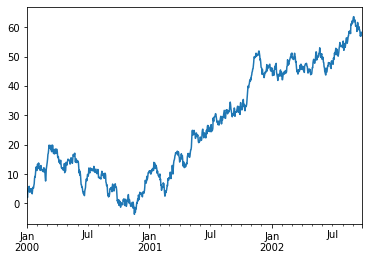

In [103]:
ts.plot()

In [104]:
df12 = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df12

,A,B,C,D
2000-01-01,0.909933,1.949185,0.541106,-0.284075
2000-01-02,0.509997,2.403118,-0.212796,-0.403150
2000-01-03,-0.404455,-0.391819,0.594994,-0.940747
2000-01-04,0.772665,0.500770,-0.938615,-0.656882
2000-01-05,-0.620377,-1.122229,-0.695798,0.500932
...,...,...,...,...
2002-09-22,-0.709458,-1.260279,-0.247947,-1.849130
2002-09-23,-1.166462,0.074517,-1.041561,0.602106
2002-09-24,0.157823,-0.968197,1.270645,-1.788142
2002-09-25,0.299495,1.092100,2.505373,-0.173245


<AxesSubplot:>

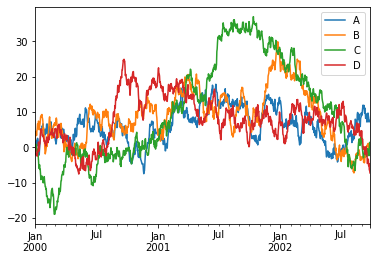

In [105]:
df12 = df12.cumsum()
df12.plot()